# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

**********************_HEAD_**********************
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE 

**********************_TAIL_**********************
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
339               NaN              NaN                NaN          NaN     NaN
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1 

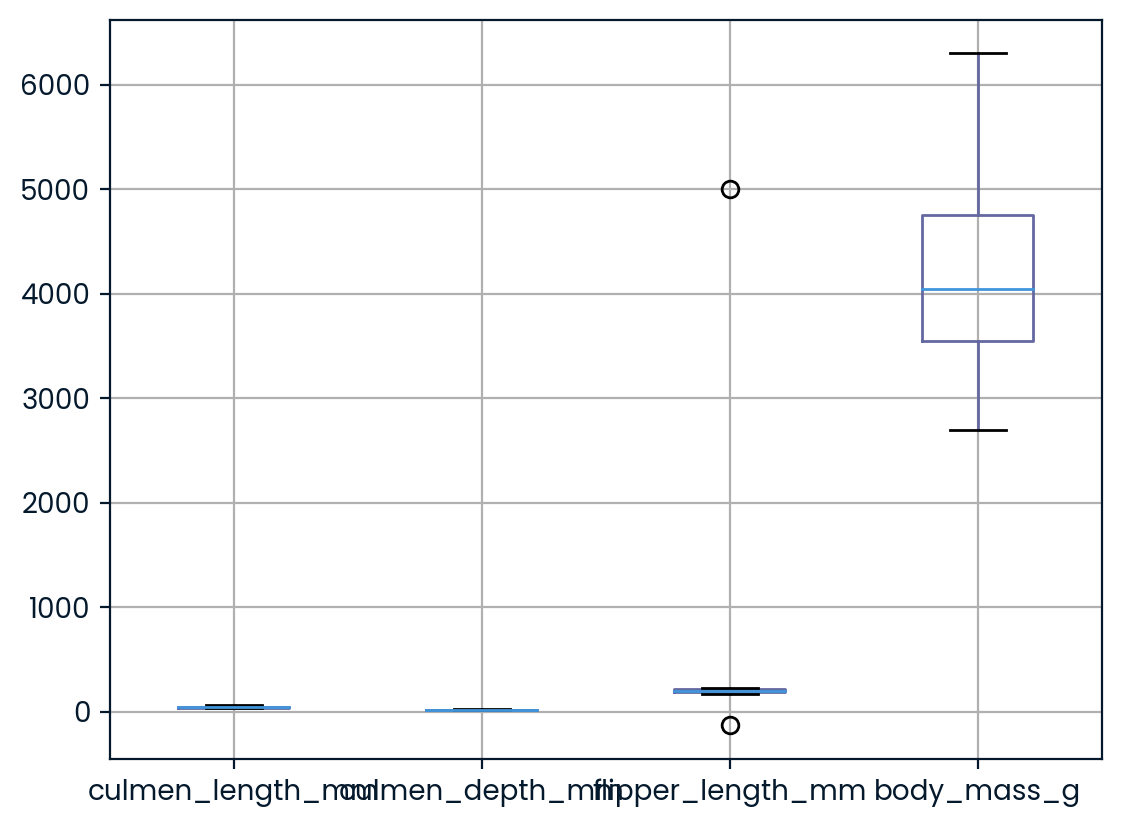

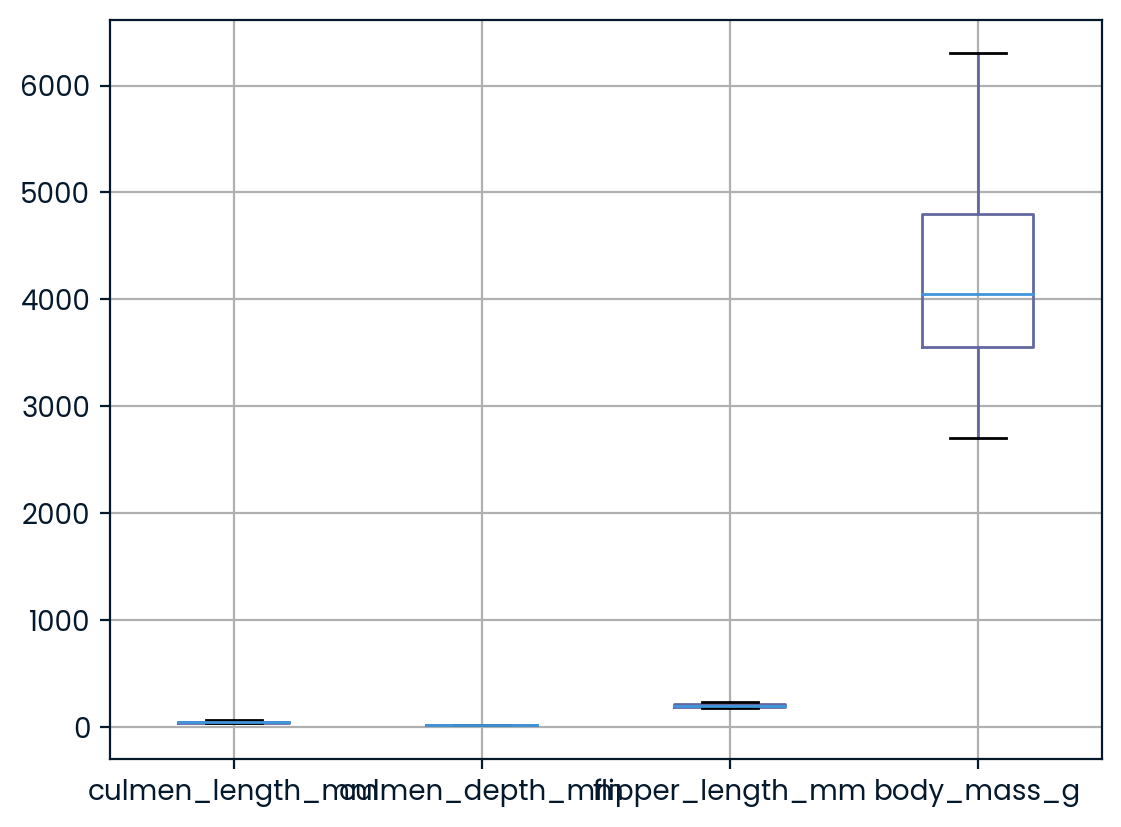

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]
[1726.2225566284403, 899.7404440438718, 436.55136086903633, 128.39199312313303, 93.95345390530491, 64.56914056291352, 55.09567384709446, 45.64834710934329, 41.0470542551772]


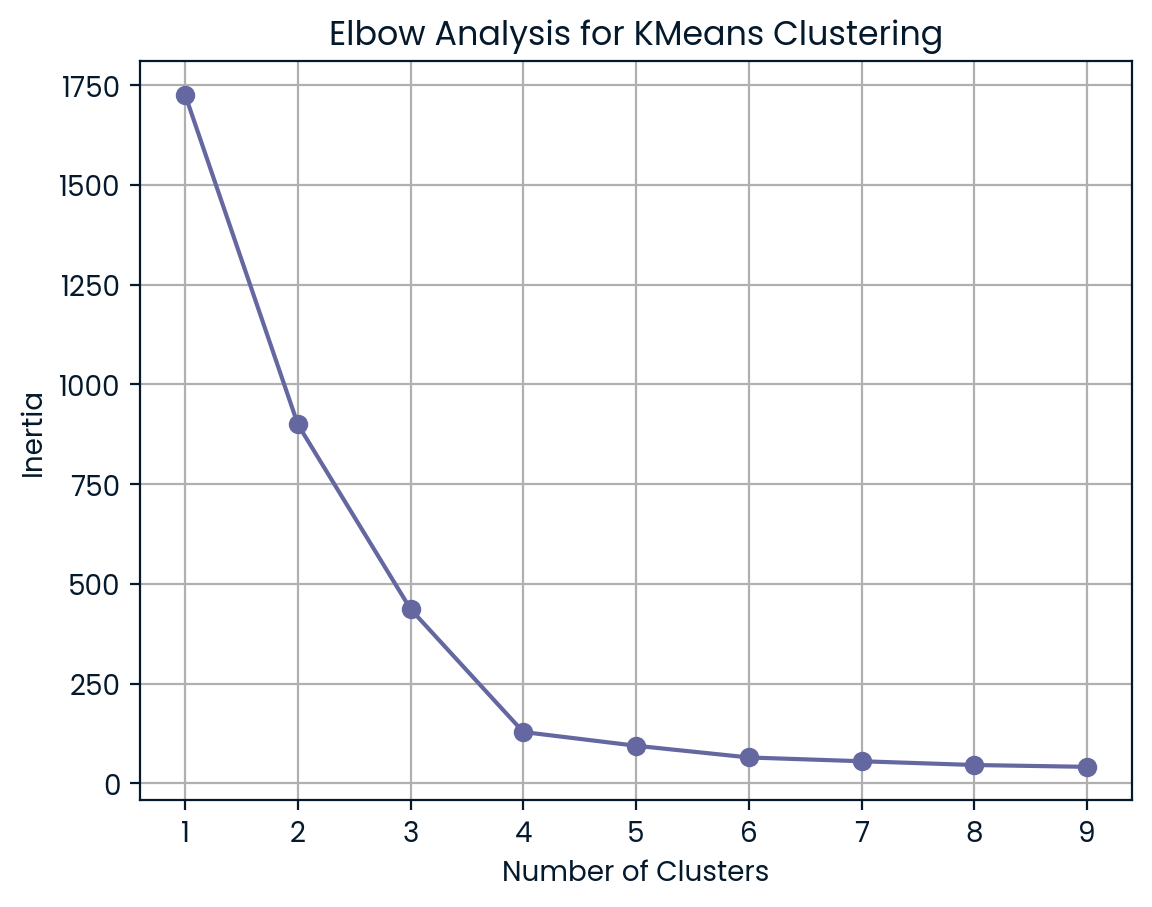

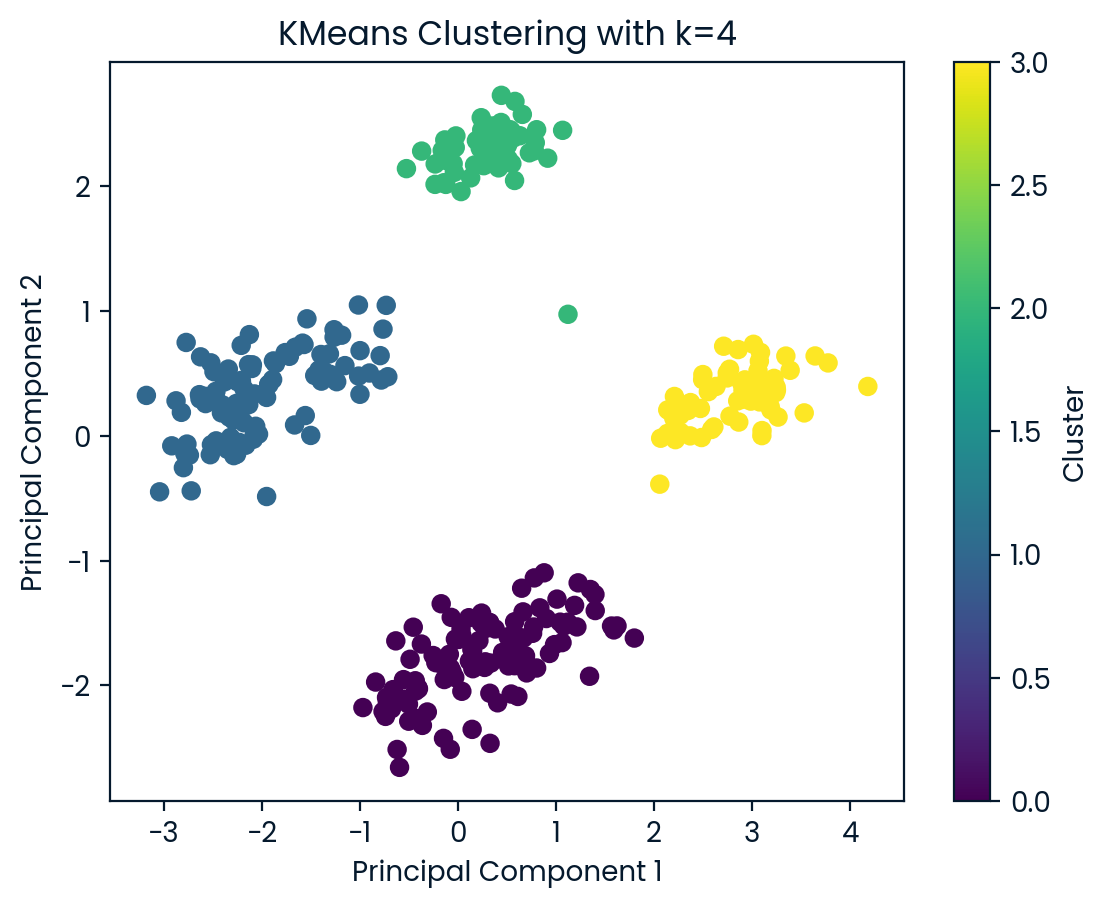

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066


In [21]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

def check_dataframe(dataframe):
    print('_HEAD_'.center(50, '*'))
    print(dataframe.head(), '\n')
    print('_TAIL_'.center(50, '*'))
    print(dataframe.tail(), '\n')
    print('_SHAPE_'.center(50, '*'))
    print(dataframe.shape, '\n')
    print('_DATAFRAME INFO_'.center(50, '*'))
    print(dataframe.info(), '\n')
    print('_COLUMNS_'.center(50, '*'))
    print(dataframe.columns, '\n')
    print('_ANY NULL VALUE_'.center(50, '*'))
    print(dataframe.isna().values.any(), '\n')
    print('_TOTAL NULL VALUES_'.center(50, '*'))
    print(dataframe.isna().sum(), '\n')
    print('_DESCRIBING DATAFRAME_'.center(50, '*'))
    print(dataframe.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_dataframe(penguins_df)

# Check outliers
penguins_df.boxplot()  
plt.show()

# Removing null and outliers values
penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])

penguins_clean.boxplot()  
plt.show()


df = pd.get_dummies(penguins_clean).drop('sex_.', axis=1)
df.head()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=scaled_data, columns = df.columns)
penguins_preprocessed.head()


pca = PCA(n_components=None)
default_pca = pca.fit(penguins_preprocessed)
print(default_pca.explained_variance_ratio_)

n_components = sum(default_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
penguins_PCA[0: 5]


inertia_values = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia_values.append(kmeans.inertia_)
    
print(inertia_values)
plt.plot(range(1, 10), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Analysis for KMeans Clustering')
plt.grid(True)
plt.show()
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'KMeans Clustering with k={n_clusters}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

penguins_clean['label'] = kmeans.labels_
numeric_columns = [col for col in penguins_clean.columns if penguins_clean[col].dtypes != 'O' and penguins_clean[col].nunique() > 4]
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
stat_penguins